# Machine Learning Nanodegree

Hello Kagglers this notebook is part of my Capstone Project for Udacity ML Engineer Nanodegree Program. You can check my [repository](https://github.com/sid321axn/Udacity-MLND-Capstone-Gold-Price-Prediction) for full documentation about the project.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


## About Data

In [2]:
df_final = pd.read_csv("maindatadonedelindicator.csv",na_values=['null'],#index_col=' ',
                       parse_dates=True,infer_datetime_format=True)

C:\Users\Nattapong\AppData\Local\Temp\ipykernel_5244\670163012.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_final = pd.read_csv("maindatadonedelindicator.csv",na_values=['null'],#index_col=' ',


In [3]:
df_final = df_final.drop(["Date","Date.1"],axis=1)


In [4]:
df_final.shape

(1329, 47)

In [5]:
df_final.describe()

,Local_Institutes_buy,Local_Institutes_sell,Local_Institutes_net,Proprietary_Trading_buy,Proprietary_Trading_sell,Proprietary_Trading_net,Foreign_Investors_buy,Foreign_Investors_sell,Foreign_Investors_net,Local Investors,...,ichimoku_base_line,ichimoku_conversion_line,parabolic_sar,EMA_10,EMA_20,EMA_50,EMA_100,bb_bbm,bb_bbh,bb_bbl
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,...,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,6048.040563,5968.675521,79.365042,6983.081185,6965.671809,17.409376,27093.712578,27512.511120,-418.798542,25746.290553,...,1551.186147,1574.913645,1585.544545,1586.997785,1587.739545,1589.627160,1592.014007,1563.392055,1609.879629,1516.904480
std,2303.176678,2242.447742,2299.142671,2265.719451,2277.128047,873.700189,10591.917041,10148.762033,2510.932539,10714.752716,...,255.122998,186.857850,143.746887,140.440309,138.174092,132.396549,124.737853,234.084180,231.879392,241.096235
min,1736.750000,2007.679872,-16545.904210,2365.397252,2257.534999,-7201.157875,6674.767973,6312.106295,-11945.649750,6583.561257,...,0.000000,0.000000,969.080017,1096.159386,1149.459989,1255.409534,1285.484888,0.000000,0.000000,0.000000
25%,4482.673132,4443.940000,-1211.485623,5429.617998,5380.427605,-366.727833,19563.482120,20505.820650,-1835.430000,17929.084310,...,1548.910034,1545.325012,1547.167454,1552.583325,1559.167366,1559.459112,1553.719792,1549.395508,1594.004551,1511.206051
50%,5623.672543,5577.400969,84.766546,6686.509228,6643.509336,62.754354,25858.871690,26283.438380,-601.585319,23201.647240,...,1612.304993,1620.059998,1612.281742,1622.743288,1622.328025,1621.444140,1624.241361,1622.368506,1653.778569,1581.558192
75%,7074.081434,7076.621362,1288.215490,8400.851794,8328.277260,464.584434,32408.411950,32644.448600,880.195634,31384.943950,...,1650.840027,1661.945007,1670.910285,1664.974764,1666.807474,1666.064950,1662.089803,1663.042987,1702.188174,1620.422925
max,23331.871670,21929.516690,11481.772090,21423.101800,22457.802520,7284.142412,168421.319000,155886.370400,18958.372660,74035.709080,...,1807.070007,1827.099976,1852.510010,1825.012760,1810.796563,1795.240361,1775.832865,1817.522992,1856.484825,1789.391510


# Checking Missing Values

In [6]:
df_final.isnull().values.any()

False

That's great ! we dont have any missing values in our dataset

## Effect of Index prices on gold rates

In [7]:
adj_close = df_final['Close']

In [8]:
test = df_final
target_adj_close = pd.DataFrame(df_final['Close'])

In [9]:
df_final.columns

Index(['Local_Institutes_buy', 'Local_Institutes_sell', 'Local_Institutes_net',
       'Proprietary_Trading_buy', 'Proprietary_Trading_sell',
       'Proprietary_Trading_net', 'Foreign_Investors_buy',
       'Foreign_Investors_sell', 'Foreign_Investors_net', 'Local Investors',
       'Unnamed: 11', 'Unnamed: 12', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'Gold_Open', 'Gold_High', 'Gold_Low',
       'Gold_Close', 'Gold_Adjclose', 'Gold_Volume', 'Dji_Open', 'Dji_High',
       'Dji_Low', 'Dji_Close', 'Dji_Adjclose', 'Dji_Volume', 'ADX',
       'Aroon_Oscillator', 'Stoch_Oscillator', 'MACD', 'RSI', 'ichimoku_a',
       'ichimoku_b', 'ichimoku_base_line', 'ichimoku_conversion_line',
       'parabolic_sar', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'bb_bbm',
       'bb_bbh', 'bb_bbl'],
      dtype='object')

In this step I would segregate feature and target variables. I will not use Close feature of GLD ETF and will use Adjusted Close of Gold ETF as target variable 

In [10]:
feature_columns = [ 'Local_Institutes_buy', 'Local_Institutes_sell',
       'Local_Institutes_net', 'Proprietary_Trading_buy',
       'Proprietary_Trading_sell', 'Proprietary_Trading_net',
       'Foreign_Investors_buy', 'Foreign_Investors_sell',
       'Foreign_Investors_net', 'Local Investors', 'Unnamed: 11',
       'Unnamed: 12', 'Open', 'High', 'Low', 'Adj Close', 'Volume',
       'Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close', 'Gold_Adjclose',
       'Gold_Volume', 'Dji_Open', 'Dji_High', 'Dji_Low', 'Dji_Close',
       'Dji_Adjclose', 'Dji_Volume', 'ADX', 'Aroon_Oscillator',
       'Stoch_Oscillator', 'MACD', 'RSI', 'ichimoku_a', 'ichimoku_b',
       'ichimoku_base_line', 'ichimoku_conversion_line', 'parabolic_sar',
       'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'bb_bbm', 'bb_bbh', 'bb_bbl']

In [11]:
"""feature_columns = ['Local_Institutes_sell','Proprietary_Trading_sell','Foreign_Investors_net', 'Unnamed: 11', 'Open' , 'Low' , 'Volume' , 'Gold_Low' ,'Gold_Open','Gold_Volume','Dji_Open','Dji_Volume','Aroon_Oscillator','Stoch_Oscillator' ]"""

"feature_columns = ['Local_Institutes_sell','Proprietary_Trading_sell','Foreign_Investors_net', 'Unnamed: 11', 'Open' , 'Low' , 'Volume' , 'Gold_Low' ,'Gold_Open','Gold_Volume','Dji_Open','Dji_Volume','Aroon_Oscillator','Stoch_Oscillator' ]"

In [12]:
"""feature_columns = ['Local_Institutes_sell','Proprietary_Trading_sell','Foreign_Investors_net', 'Unnamed: 11', 'Open' , 'Low' , 'Close' , 'Volume' ,'Gold_Open','Gold_Volume','Dji_Open','Dji_Volume']"""

"feature_columns = ['Local_Institutes_sell','Proprietary_Trading_sell','Foreign_Investors_net', 'Unnamed: 11', 'Open' , 'Low' , 'Close' , 'Volume' ,'Gold_Open','Gold_Volume','Dji_Open','Dji_Volume']"

## Normalizing the data

In this step I would perform feature scaling/normalization of feature variables using sklearn's MinMaxScaler function.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Local_Institutes_buy,Local_Institutes_sell,Local_Institutes_net,Proprietary_Trading_buy,Proprietary_Trading_sell,Proprietary_Trading_net,Foreign_Investors_buy,Foreign_Investors_sell,Foreign_Investors_net,Local Investors,...,ichimoku_base_line,ichimoku_conversion_line,parabolic_sar,EMA_10,EMA_20,EMA_50,EMA_100,bb_bbm,bb_bbh,bb_bbl
0,0.240690,0.216279,0.612396,0.191495,0.184212,0.499634,0.068430,0.078236,0.377767,0.240068,...,0.0,0.0,0.840655,0.844588,0.850218,0.845321,0.869291,0.0,0.0,0.0
1,0.281894,0.243316,0.624926,0.220295,0.193547,0.524507,0.067946,0.074177,0.394881,0.268660,...,0.0,0.0,0.841798,0.844840,0.850363,0.845395,0.869332,0.0,0.0,0.0
2,0.245139,0.290884,0.562795,0.216118,0.201593,0.507791,0.072551,0.077229,0.404208,0.310435,...,0.0,0.0,0.842172,0.845520,0.850768,0.845603,0.869449,0.0,0.0,0.0
3,0.166339,0.219338,0.552934,0.233260,0.220177,0.504428,0.064519,0.083769,0.330518,0.284773,...,0.0,0.0,0.838471,0.843178,0.849462,0.844959,0.869094,0.0,0.0,0.0
4,0.144043,0.174499,0.567627,0.195992,0.174688,0.518831,0.056655,0.081924,0.298293,0.351682,...,0.0,0.0,0.848579,0.837831,0.846299,0.843342,0.868191,0.0,0.0,0.0


## split 1000 300 

In [14]:
#963 770  193
#365 
X_train1 = feature_minmax_transform[:770]
y_train1 = target_adj_close[:770]
X_test1 = feature_minmax_transform[770:963]
y_test1 = target_adj_close[770:963]

X_train2 = feature_minmax_transform[328:1135]
y_train2 = target_adj_close[328:1135]
X_test2 = feature_minmax_transform[1135:1328]
y_test2 = target_adj_close[1135:1328]

In [15]:
print(X_train1.shape)
print(X_train2.shape)
print(X_test1.shape)
print(X_test2.shape)
print(y_train1.shape)
print(y_train2.shape)
print(y_test1.shape)
print(y_test2.shape)

(770, 46)
(807, 46)
(193, 46)
(193, 46)
(770, 1)
(807, 1)
(193, 1)
(193, 1)


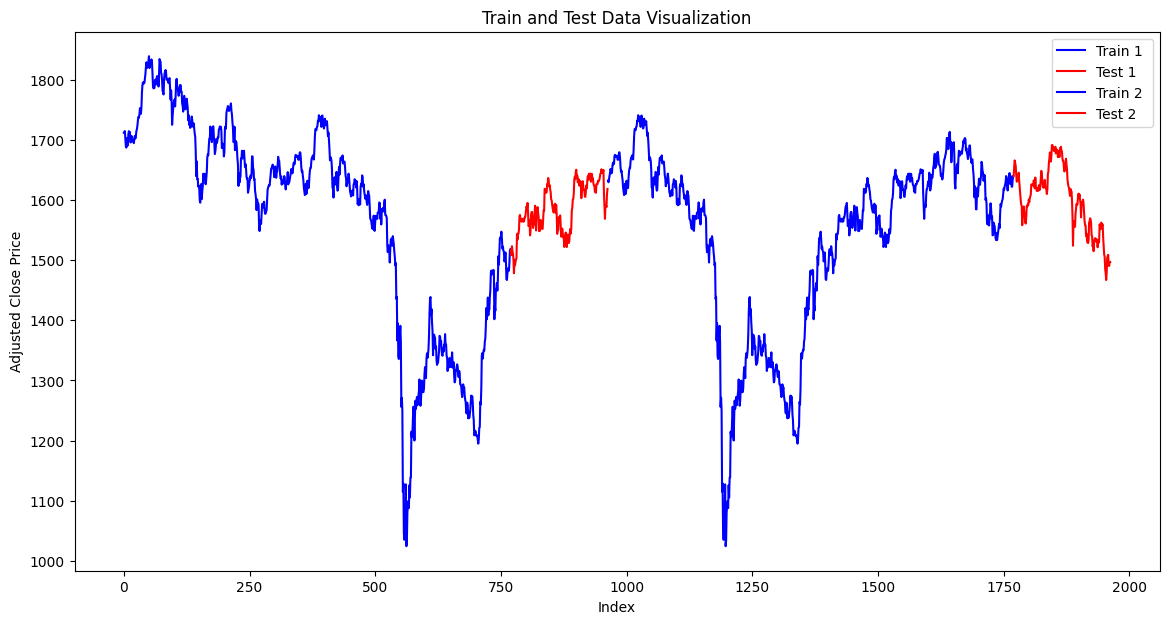

In [16]:
plt.figure(figsize=(14, 7))

# Train data
plt.plot(y_train1, label='Train 1', color='blue')

# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), y_test1, label='Test 1', color='red')
plt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')

plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)), y_test2, label='Test 2', color='red')
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.title('Train and Test Data Visualization')
plt.legend()
plt.show()

In [17]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [18]:
def validate_result1(model, model_name):
    predictedfirst = model.predict(X_test1)
   # Calculate MSE
    MSE_score = mean_squared_error(y_test1, predictedfirst)
    print('MSE: ', MSE_score)
    

    y_test_np = y_test1.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
    predicted_np = np.array(predictedfirst)
    # Calculate MAPE
    MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
    print('MAPE: ', MAPE_score, '%')

    plt.plot(y_test1.index, predictedfirst,'r', label='Predict')
    plt.plot(y_test1.index, y_test1,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()   
    return MSE_score,MAPE_score

In [19]:
def validate_resulttrain1(model, model_name):
    predictedfirst = model.predict(X_train1)
   # Calculate MSE
    MSE_score = mean_squared_error(y_train1, predictedfirst)
    print('MSE: ', MSE_score)
    

    y_test_np = y_train1.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
    predicted_np = np.array(predictedfirst)
    # Calculate MAPE
    MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
    print('MAPE: ', MAPE_score, '%')    

    plt.plot(y_train1.index, predictedfirst,'r', label='Predict')
    plt.plot(y_train1.index, y_train1,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
    return MSE_score,MAPE_score

In [20]:
def validate_result2(model, model_name):
    predictedfirst = model.predict(X_test2)
   # Calculate MSE
    MSE_score = mean_squared_error(y_test2, predictedfirst)
    print('MSE: ', MSE_score)
    

    y_test_np = y_test2.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
    predicted_np = np.array(predictedfirst)
    # Calculate MAPE
    MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
    print('MAPE: ', MAPE_score, '%')

    plt.plot(y_test2.index, predictedfirst,'r', label='Predict')
    plt.plot(y_test2.index, y_test2,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
    return MSE_score,MAPE_score

In [21]:
def validate_resulttrain2(model, model_name):
    predictedfirst = model.predict(X_train2)
   # Calculate MSE
    MSE_score = mean_squared_error(y_train2, predictedfirst)
    print('MSE: ', MSE_score)
    

    y_test_np = y_train2.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
    predicted_np = np.array(predictedfirst)
    # Calculate MAPE
    MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
    print('MAPE: ', MAPE_score, '%')

    plt.plot(y_train2.index, predictedfirst,'r', label='Predict')
    plt.plot(y_train2.index, y_train2,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
    return MSE_score,MAPE_score

## Model Building

### 1. Benchmark Model :
       I will use Decision Tree Regressor with default parameter as my Benchmark model for the project.

MSE:  4.319041225636586
MAPE:  2.9575937918954116 %


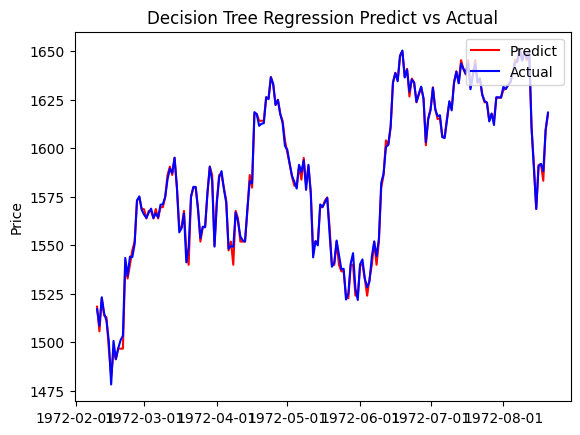

4.319041225636586
2.9575937918954116
MSE:  0.0
MAPE:  13.253886601840264 %


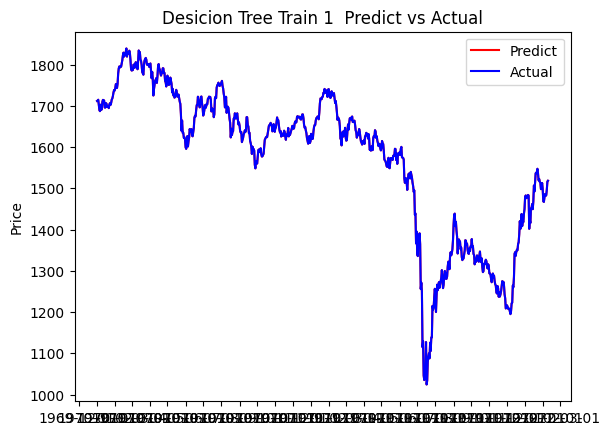

0.0
13.253886601840264


In [22]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train1, y_train1)

dtmsetest1 , dtmapetest1 = validate_result1(benchmark_dt, 'Decision Tree Regression')
print(dtmsetest1)
print(dtmapetest1)
dtmsetrain1 , dtmapetrain1= validate_resulttrain1(benchmark_dt,'Desicion Tree Train 1 ')
print(dtmsetrain1)
print(dtmapetrain1)

dtpredictfirst = benchmark_dt.predict(X_test1)

MSE:  0.7390479119046361
MAPE:  3.914735299087383 %


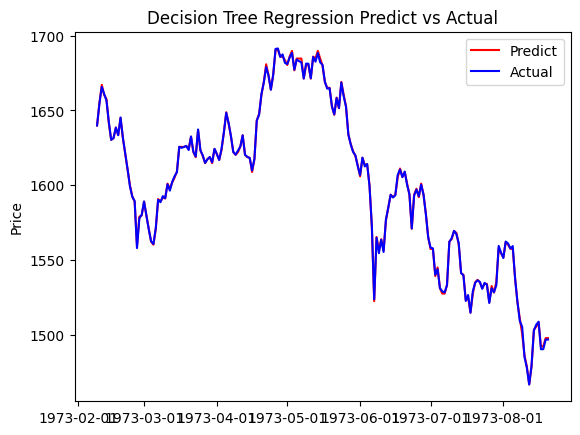

0.7390479119046361
3.914735299087383
MSE:  0.0
MAPE:  10.885821259680629 %


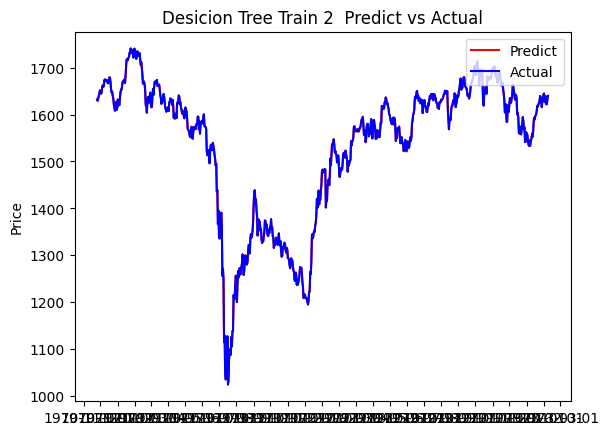

0.0
10.885821259680629


In [23]:

benchmark_dt=dt.fit(X_train2, y_train2)

dtmsetest2 , dtmapetest2 = validate_result2(benchmark_dt, 'Decision Tree Regression')
print(dtmsetest2)
print(dtmapetest2)
dtmsetrain2 , dtmapetrain2 = validate_resulttrain2(benchmark_dt,'Desicion Tree Train 2 ')

print(dtmsetrain2)
print(dtmapetrain2)
dtpredictsecond = benchmark_dt.predict(X_test2)

In [24]:
"""plt.figure(figsize=(14, 7))

# Train data
plt.plot(y_train1, label='Train 1', color='blue')

# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), , label='Test 1', color='red')
plt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')

plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)), dtpredictedsecond, label='Test 2', color='red')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('decision tree')
plt.legend()
plt.show()
"""

"plt.figure(figsize=(14, 7))\n\n# Train data\nplt.plot(y_train1, label='Train 1', color='blue')\n\n# Test data\nplt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), , label='Test 1', color='red')\nplt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')\n\nplt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)), dtpredictedsecond, label='Test 2', color='red')\nplt.xlabel('Index')\nplt.ylabel('Close Price')\nplt.title('decision tree')\nplt.legend()\nplt.show()\n"

In [25]:
"""decisiontree_alltest = np.concatenate([dtpredictedfirst,dtpredictedsecond])"""

'decisiontree_alltest = np.concatenate([dtpredictedfirst,dtpredictedsecond])'

In [26]:
print(f"DT mse test1 : {dtmsetest1} mape : {dtmapetest1}")
print(f"DT mse test2 : {dtmsetest2} mape : {dtmapetest2}")
print("-------------------------------")
print(f"DT mse train1 : {dtmsetrain1} mape : {dtmapetrain1}")
print(f"DT mse train2 : {dtmsetrain2} mape : {dtmapetrain2}")
print("-------------------------------")

DT mse test1 : 4.319041225636586 mape : 2.9575937918954116
DT mse test2 : 0.7390479119046361 mape : 3.914735299087383
-------------------------------
DT mse train1 : 0.0 mape : 13.253886601840264
DT mse train2 : 0.0 mape : 10.885821259680629
-------------------------------


## Solution Model 

### Support Vector Regressor (SVR)

MSE:  18.853885282453557
MAPE:  2.981956903540295 %


c:\Users\Nattapong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


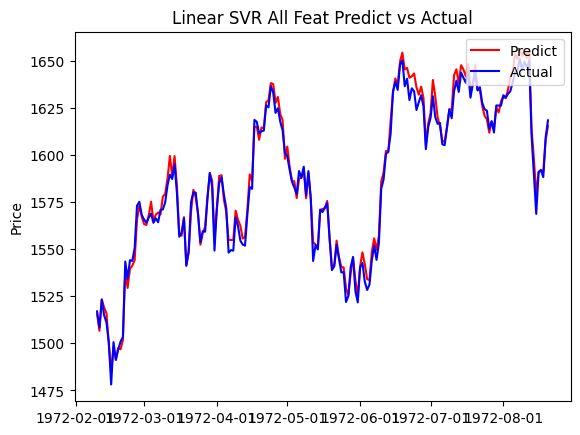

MSE:  46.72741164590228
MAPE:  13.214338853224156 %


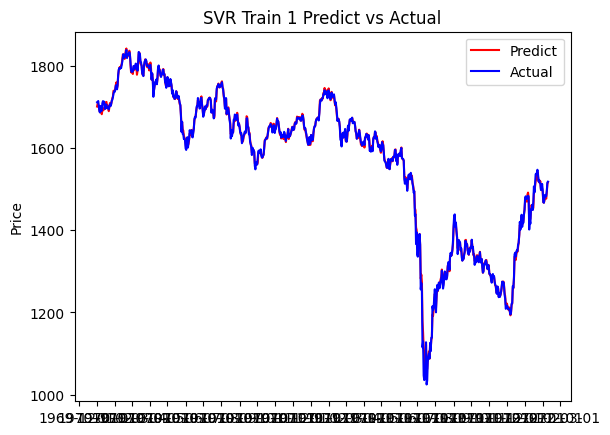

In [27]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear', C=15, epsilon=0.1, gamma='scale')
linear_svr_clf_feat = svr_lin.fit(X_train1,y_train1)
svrmsetest1 ,svrmapetest1 = validate_result1(linear_svr_clf_feat,'Linear SVR All Feat')
svrmsetrain1 , svrmapetrain1 = validate_resulttrain1(linear_svr_clf_feat,'SVR Train 1')


In [28]:
SVRpredictedfirst = linear_svr_clf_feat.predict(X_test1)
SVRmsefirst =  mean_squared_error(y_test1, SVRpredictedfirst)

y_test_np = y_test1.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
predicted_np = np.array(SVRpredictedfirst)
# Calculate MAPE
MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
SVRmapefirst = MAPE_score 

print(SVRmsefirst)
print(SVRmapefirst)

18.853885282453557
2.981956903540295


MSE:  10.695539456647559
MAPE:  3.908476709285281 %


c:\Users\Nattapong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


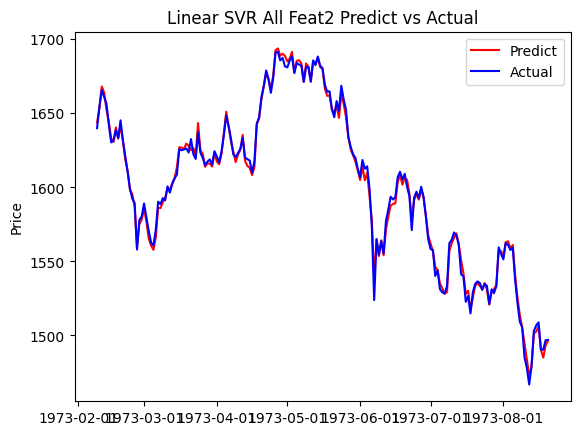

MSE:  42.208531239912475
MAPE:  10.865992144809251 %


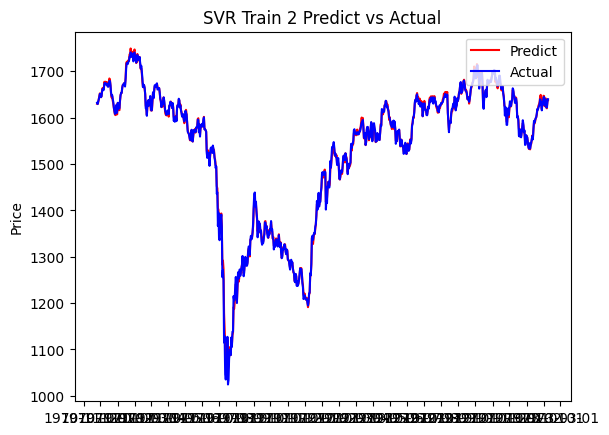

In [29]:
# Save all soultion models
solution_models = {}
linear_svr_clf_feat = svr_lin.fit(X_train2,y_train2)
svrmsetest2 ,svrmapetest2 = validate_result2(linear_svr_clf_feat,'Linear SVR All Feat2')

svrmsetrain2 , svrmapetrain2 = validate_resulttrain2(linear_svr_clf_feat,'SVR Train 2')

In [30]:
SVRpredictedSecond = linear_svr_clf_feat.predict(X_test2)
SVRmseSecond =  mean_squared_error(y_test2, SVRpredictedSecond)

y_test_np = y_test2.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
predicted_np = np.array(SVRpredictedSecond)
# Calculate MAPE
MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
SVRmapeSecond = MAPE_score 

print(SVRmseSecond)
print(SVRmapeSecond)

10.695539456647559
3.908476709285281


In [31]:

solution_models['SVR'] = linear_svr_clf_feat

In [32]:
print(f"SVR mse test1 : {svrmsetest1} mape : {svrmapetest1}")
print(f"SVR mse test2 : {svrmsetest2} mape : {svrmapetest2}")
print("-------------------------------")
print(f"SVR mse train1 : {svrmsetrain1} mape : {svrmapetrain1}")
print(f"SVR mse train2 : {svrmsetrain2} mape : {svrmapetrain2}")
print("-------------------------------")

SVR mse test1 : 18.853885282453557 mape : 2.981956903540295
SVR mse test2 : 10.695539456647559 mape : 3.908476709285281
-------------------------------
SVR mse train1 : 46.72741164590228 mape : 13.214338853224156
SVR mse train2 : 42.208531239912475 mape : 10.865992144809251
-------------------------------


In [33]:
"""plt.figure(figsize=(14, 7))

plt.plot(y_train1, label='Train 1', color='blue')

# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), SVRpredictedfirst, label='Test 1', color='red')
plt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),SVRpredictedSecond, label='Test 2', color='red')
SVRallmse = SVRmsefirst + SVRmseSecond
SVRaveragemse = SVRallmse/2

SVRallmape = SVRmapefirst + SVRmapeSecond 
SVRaveragemape = SVRallmape/2

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.title('SVR')
plt.legend()
plt.show()
print(SVRaveragemse)
print(SVRaveragemape , '%')"""

"plt.figure(figsize=(14, 7))\n\nplt.plot(y_train1, label='Train 1', color='blue')\n\n# Test data\nplt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), SVRpredictedfirst, label='Test 1', color='red')\nplt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')\nplt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),SVRpredictedSecond, label='Test 2', color='red')\nSVRallmse = SVRmsefirst + SVRmseSecond\nSVRaveragemse = SVRallmse/2\n\nSVRallmape = SVRmapefirst + SVRmapeSecond \nSVRaveragemape = SVRallmape/2\n\n# Labels and Legend\nplt.xlabel('Index')\nplt.ylabel('Adjusted Close Price')\nplt.title('SVR')\nplt.legend()\nplt.show()\nprint(SVRaveragemse)\nprint(SVRaveragemape , '%')"

In [34]:
SVRalltestdf = np.concatenate([SVRpredictedfirst, SVRpredictedSecond])

## Solution Model : Random Forest

c:\Users\Nattapong\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE:  10.539493242090238
MAPE:  2.9735855980873045 %


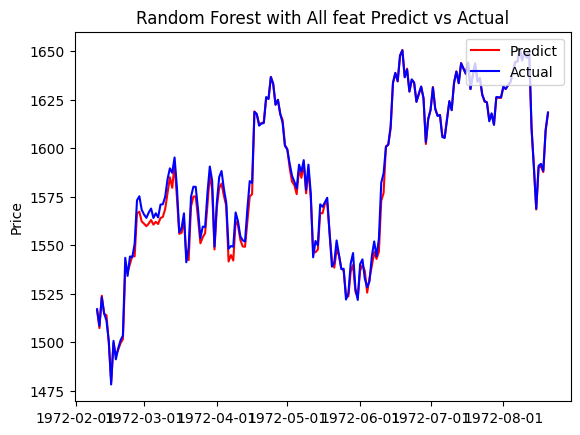

MSE:  3.61340658264548
MAPE:  13.254897461216855 %


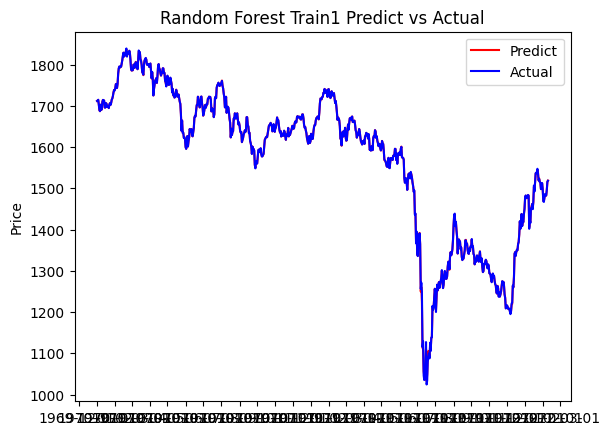

In [35]:

rf_cl = RandomForestRegressor(
    #random_state=100,
   # n_estimators=100,      # Try increasing this
)
random_forest_clf_feat = rf_cl.fit(X_train1,y_train1)
rfmsetest1, rfmapetest1 = validate_result1(random_forest_clf_feat,'Random Forest with All feat')
rfmsetrain1, rfmapetrain1 = validate_resulttrain1(random_forest_clf_feat,'Random Forest Train1')

In [36]:
RFpredictedfirst = random_forest_clf_feat.predict(X_test1)

RFmsefirst =  mean_squared_error(y_test1, RFpredictedfirst)

y_test_np = y_test1.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
predicted_np = np.array(RFpredictedfirst)
# Calculate MAPE
MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
RFmapefirst = MAPE_score 

print(RFmsefirst)
print(RFmapefirst)


10.539493242090238
2.9735855980873045


In [37]:
solution_models['Random_Forest'] = random_forest_clf_feat

MSE:  4.218755522397522
MAPE:  3.9245971561797828 %


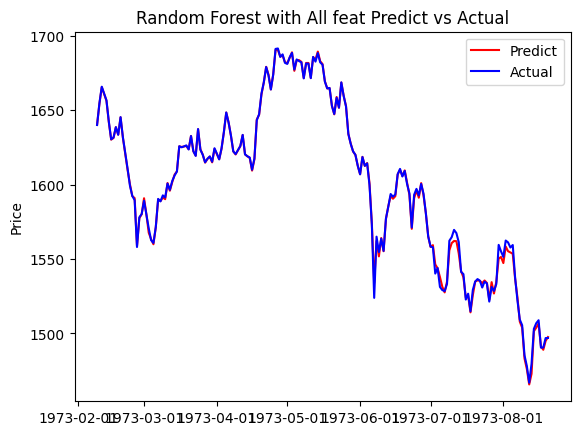

MSE:  6.321091481742796
MAPE:  10.889457333076953 %


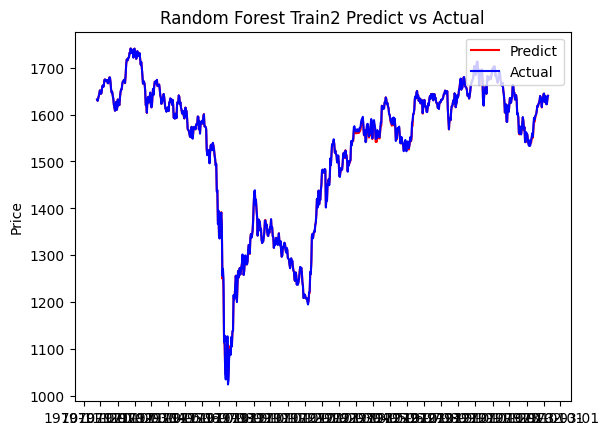

In [38]:
#random_forest_clf_feat = rf_cl.fit(X_train2,y_train2)   
rfmsetest2, rfmapetest2 = validate_result2(random_forest_clf_feat,'Random Forest with All feat')
rfmsetrain2, rfmapetrain2 = validate_resulttrain2(random_forest_clf_feat,'Random Forest Train2')

In [39]:
RFpredictedsecond = random_forest_clf_feat.predict(X_test2)
RFmseSecond =  mean_squared_error(y_test2, RFpredictedsecond)

y_test_np = y_test2.to_numpy()  # Convert y_test1 to numpy array if it's a pandas Series
# Calculate MAPE
MAPE_score = np.mean(np.abs((y_test_np - predicted_np) / y_test_np)) * 100
RFmapeSecond = MAPE_score 

print(RFmseSecond)
print(RFmapeSecond)

4.218755522397522
3.583417038567945


In [40]:
solution_models['Random_Forest'] = random_forest_clf_feat

In [41]:
print(f"RF mse test1 : {rfmsetest1} mape : {svrmapetest1}")
print(f"RF mse test2 : {svrmsetest2} mape : {svrmapetest2}")
print("-------------------------------")
print(f"RF mse train1 : {svrmsetrain1} mape : {svrmapetrain1}")
print(f"RF mse train2 : {svrmsetrain2} mape : {svrmapetrain2}")
print("-------------------------------")

RF mse test1 : 10.539493242090238 mape : 2.981956903540295
RF mse test2 : 10.695539456647559 mape : 3.908476709285281
-------------------------------
RF mse train1 : 46.72741164590228 mape : 13.214338853224156
RF mse train2 : 42.208531239912475 mape : 10.865992144809251
-------------------------------


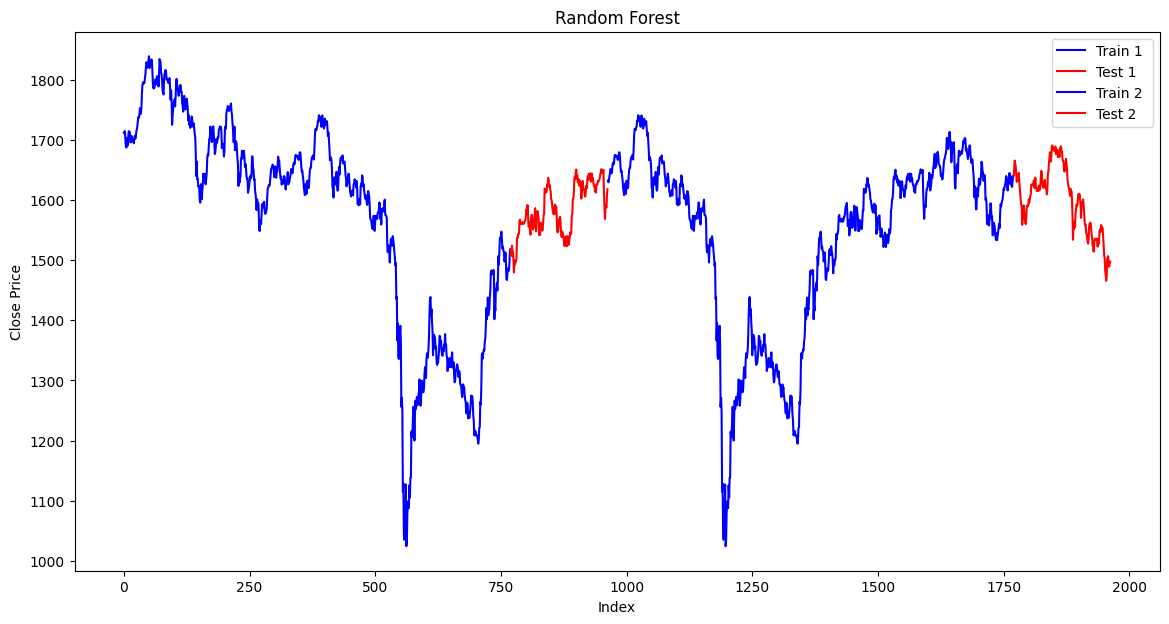

7.37912438224388
3.278501318327625 %


In [42]:
plt.figure(figsize=(14, 7))

plt.plot(y_train1, label='Train 1', color='blue')

# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), RFpredictedfirst, label='Test 1', color='red')
plt.plot(range(len(y_train1) + len(y_test1), len(y_train1) + len(y_test1) + len(y_train2)), y_train2, label='Train 2 ', color='blue')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),RFpredictedsecond, label='Test 2', color='red')

RFallmse = RFmsefirst + RFmseSecond
RFaveragemse = RFallmse/2

RFallmape = RFmapefirst + RFmapeSecond
RFaveragemape = RFallmape/2

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Random Forest')
plt.legend()
plt.show()
print(RFaveragemse)
print(RFaveragemape , '%')

In [43]:
RFalltestdf = np.concatenate([RFpredictedfirst, RFpredictedsecond])


As we have seen, Random forest with default parameters performed better than tuned Random forest model.So, we will include random forest with default parameters as our second solution model.

In [44]:
print(f"DT mse test1 : {dtmsetest1} mape : {dtmapetest1}")
print(f"DT mse test2 : {dtmsetest2} mape2 : {dtmapetest2}")
print("-------------------------------")
print(f"DT mse train1 : {dtmsetrain1} mape : {dtmapetrain1}")
print(f"DT mse train2 : {dtmsetrain2} mape2 : {dtmapetrain2}")
print("-------------------------------")

DT mse test1 : 4.319041225636586 mape : 2.9575937918954116
DT mse test2 : 0.7390479119046361 mape2 : 3.914735299087383
-------------------------------
DT mse train1 : 0.0 mape : 13.253886601840264
DT mse train2 : 0.0 mape2 : 10.885821259680629
-------------------------------


In [45]:
print(f"RF mse test1 : {rfmsetest1} mape : {svrmapetest1}")
print(f"RF mse test2 : {svrmsetest2} mape : {svrmapetest2}")
print("-------------------------------")
print(f"RF mse train1 : {svrmsetrain1} mape : {svrmapetrain1}")
print(f"RF mse train2 : {svrmsetrain2} mape : {svrmapetrain2}")
print("-------------------------------")

RF mse test1 : 10.539493242090238 mape : 2.981956903540295
RF mse test2 : 10.695539456647559 mape : 3.908476709285281
-------------------------------
RF mse train1 : 46.72741164590228 mape : 13.214338853224156
RF mse train2 : 42.208531239912475 mape : 10.865992144809251
-------------------------------


In [46]:
print(f"SVR mse test1 : {svrmsetest1} mape : {svrmapetest1}")
print(f"SVR mse test2 : {svrmsetest2} mape : {svrmapetest2}")
print("-------------------------------")
print(f"SVR mse train1 : {svrmsetrain1} mape : {svrmapetrain1}")
print(f"SVR mse train2 : {svrmsetrain2} mape : {svrmapetrain2}")
print("-------------------------------")

SVR mse test1 : 18.853885282453557 mape : 2.981956903540295
SVR mse test2 : 10.695539456647559 mape : 3.908476709285281
-------------------------------
SVR mse train1 : 46.72741164590228 mape : 13.214338853224156
SVR mse train2 : 42.208531239912475 mape : 10.865992144809251
-------------------------------


In [47]:
print("lstm mse1 : 143.43843474415505 mse2 : 231.79974748139358")
print("lstm mape1 : 2.93950440550919 mape2 : 3.882432312355509")

lstm mse1 : 143.43843474415505 mse2 : 231.79974748139358
lstm mape1 : 2.93950440550919 mape2 : 3.882432312355509


## Model Review
In this step, we will review benchmark model and all the solution model based on evaluation metrics i.e, RMSE and R2 score

In [48]:
solution_models

{'SVR': SVR(C=15, kernel='linear'), 'Random_Forest': RandomForestRegressor()}

In [49]:
flstm = pd.read_csv('flstm.csv')
slstm = pd.read_csv('slstm.csv')

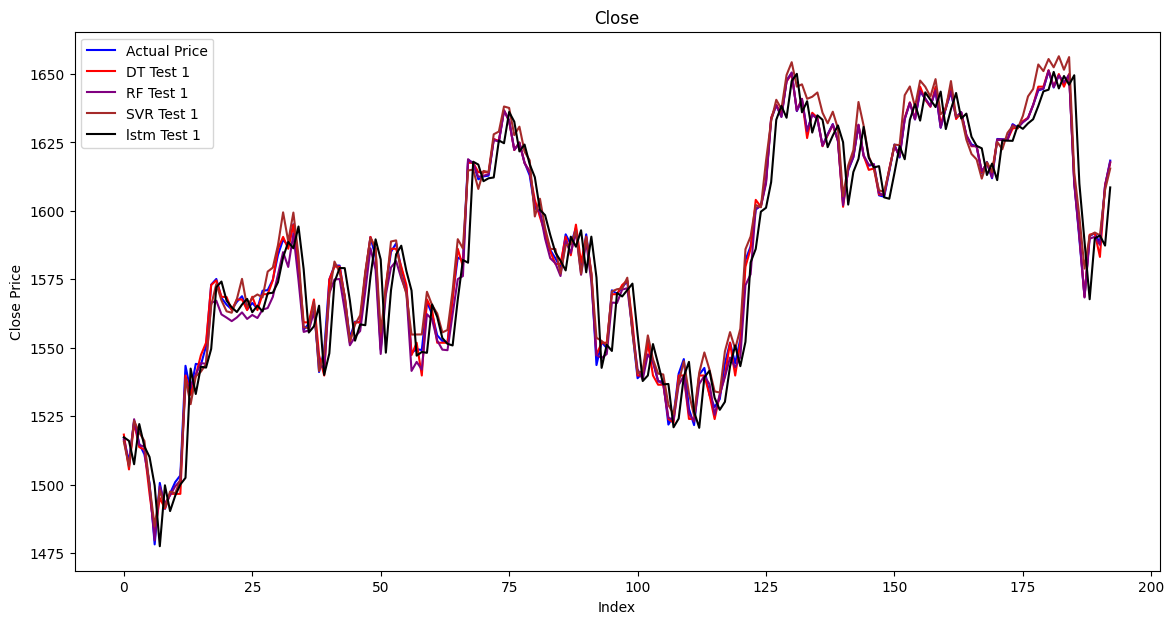

In [50]:
#y test 2 

plt.figure(figsize=(14, 7))

#decisiontree_alltest = DT
#svr = result
plt.plot(range(0,len(y_test1)),y_test1, label='Actual Price', color='blue')
plt.plot(dtpredictfirst, label='DT Test 1', color='red')
plt.plot(RFpredictedfirst, label='RF Test 1', color='purple')
plt.plot(SVRpredictedfirst, label='SVR Test 1', color='brown')
plt.plot(flstm, label='lstm Test 1', color='black')

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close')
plt.legend()
plt.show()
#dt

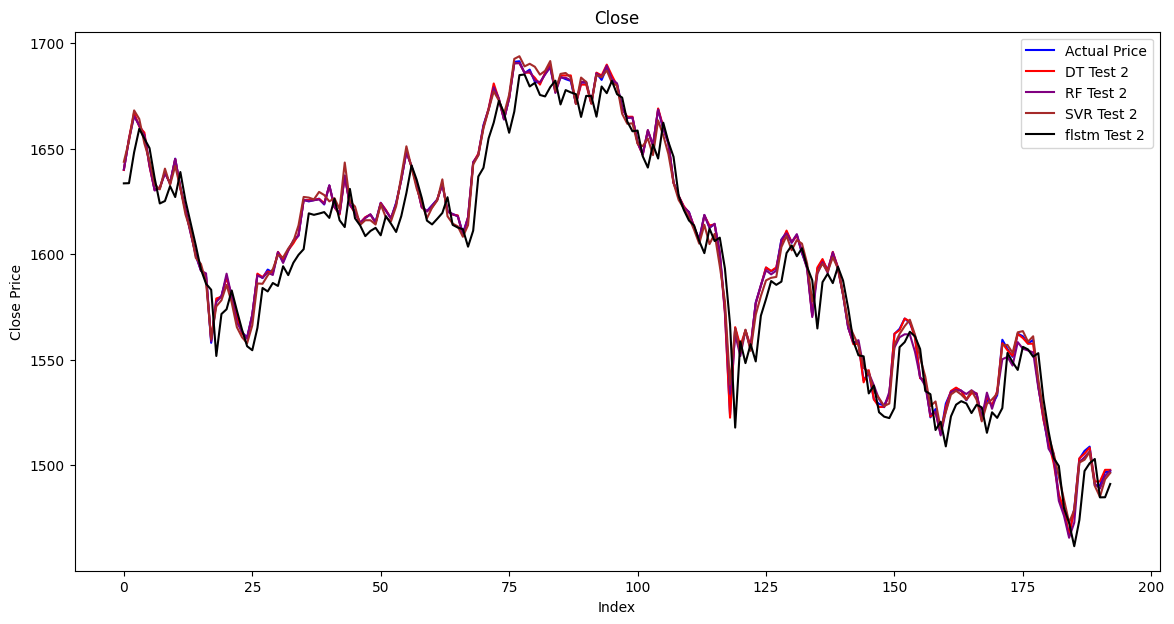

In [51]:
#y test 2 

plt.figure(figsize=(14, 7))

#decisiontree_alltest = DT
#svr = result
plt.plot(range(0,len(y_test2)),y_test2, label='Actual Price', color='blue')
plt.plot(dtpredictsecond, label='DT Test 2', color='red')
plt.plot(RFpredictedsecond, label='RF Test 2', color='purple')
plt.plot(SVRpredictedSecond, label='SVR Test 2', color='brown')
plt.plot(slstm, label='flstm Test 2', color='black')

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close')
plt.legend()
plt.show()
#dt

In [52]:
yalltestdf = pd.concat([y_test1, y_test2], ignore_index=True)

In [53]:
yalltestdf

,Close
0,1516.939941
1,1508.349976
2,1523.109985
3,1514.910034
4,1511.030029
...,...
381,1508.869995
382,1490.459961
383,1490.510010
384,1496.890015


In [54]:
df = y_test2

In [55]:
df["Decision Tree"] = dtpredictsecond
df["Random Forest"] = RFpredictedsecond
df['SVR'] = SVRpredictedSecond

C:\Users\Nattapong\AppData\Local\Temp\ipykernel_5244\1909847986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Decision Tree"] = dtpredictsecond
C:\Users\Nattapong\AppData\Local\Temp\ipykernel_5244\1909847986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Random Forest"] = RFpredictedsecond
C:\Users\Nattapong\AppData\Local\Temp\ipykernel_5244\1909847986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [56]:
df.to_csv('Actual+3model.csv',index = False)

In [57]:
df

,Close,Decision Tree,Random Forest,SVR
1135,1640.000000,1639.920044,1640.172211,1643.779741
1136,1654.619995,1654.920044,1654.263507,1653.628930
1137,1665.739990,1667.119995,1665.461123,1668.132801
1138,1661.089966,1660.449951,1660.902599,1664.088984
1139,1656.579956,1657.619995,1656.261195,1652.461898
...,...,...,...,...
1323,1508.869995,1508.349976,1506.632313,1506.315760
1324,1490.459961,1492.359985,1491.349894,1490.257231
1325,1490.510010,1492.359985,1489.018392,1485.074724
1326,1496.890015,1497.880005,1494.959297,1493.383149


In [58]:
actualprice = pd.concat([y_train1,y_test1,y_train2,y_test2], ignore_index=True)

In [59]:
lstmallpredict = pd.read_csv('lstm.csv')
lstmallpredict

,Close
0,1628.0726
1,1628.1508
2,1642.3774
3,1653.1753
4,1648.6626
...,...
188,1497.5513
189,1499.5491
190,1481.4305
191,1481.4800


NameError: name 'dtpredictedfirst' is not defined

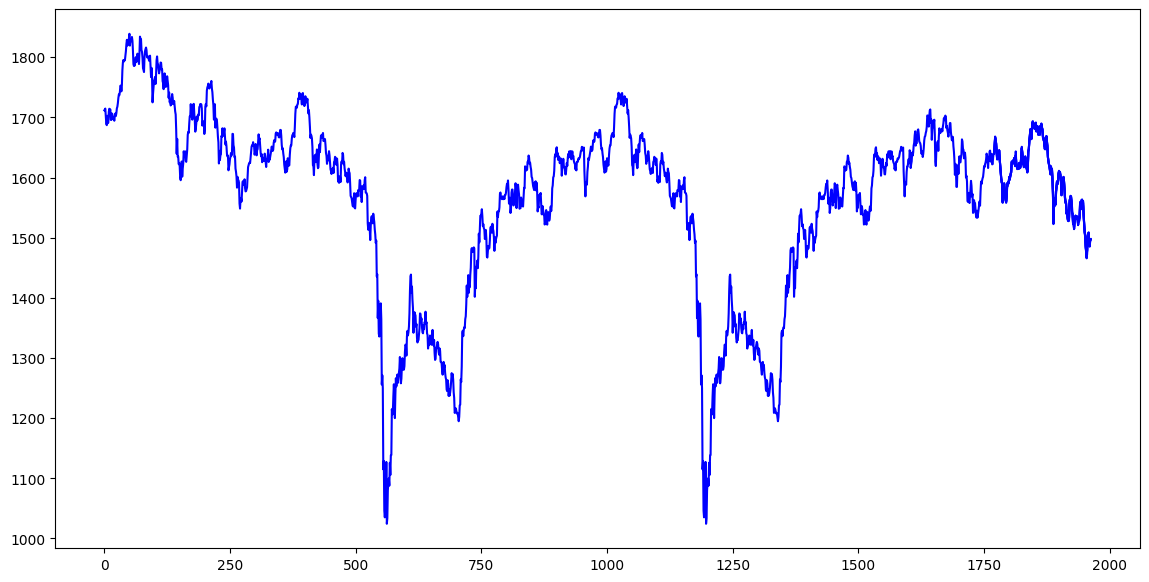

In [60]:
plt.figure(figsize=(14, 7))

#decisiontree_alltest = DT
#svr = result
plt.plot(actualprice, label='Actual Price', color='blue')
# Test data
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), dtpredictedfirst, label='DT Test 1', color='red')
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), RFpredictedfirst, label='RF Test 1', color='purple')
plt.plot(range(len(y_train1), len(y_train1) + len(y_test1)), SVRpredictedfirst, label='SVR Test 1', color='brown')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),dtpredictedsecond, label='DT Test 2', color='red')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),RFpredictedsecond, label='RF Test 2', color='purple')
plt.plot(range(len(y_train1) + len(y_test1) + len(y_train2),len(y_train1) + len(y_test1) + len(y_train2) + len(y_test2)),SVRpredictedSecond, label='SVR Test 2', color='brown')

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close')
plt.legend()
plt.show()
#dt
print('Decision Tree - Mse: ' + str(DTaveragemse) + ', Mape: ' + str(DTaveragemape))
#svr
print('Support Vector regresser - Mse: ' + str(SVRaveragemse) + ', Mape: ' + str(SVRaveragemape))
#rf
print('Random Forest - Mse: ' + str(RFaveragemse) + ', Mape: ' + str(RFaveragemape))

print('Long Short Term memory - Mse: wating, Mape: waiting')

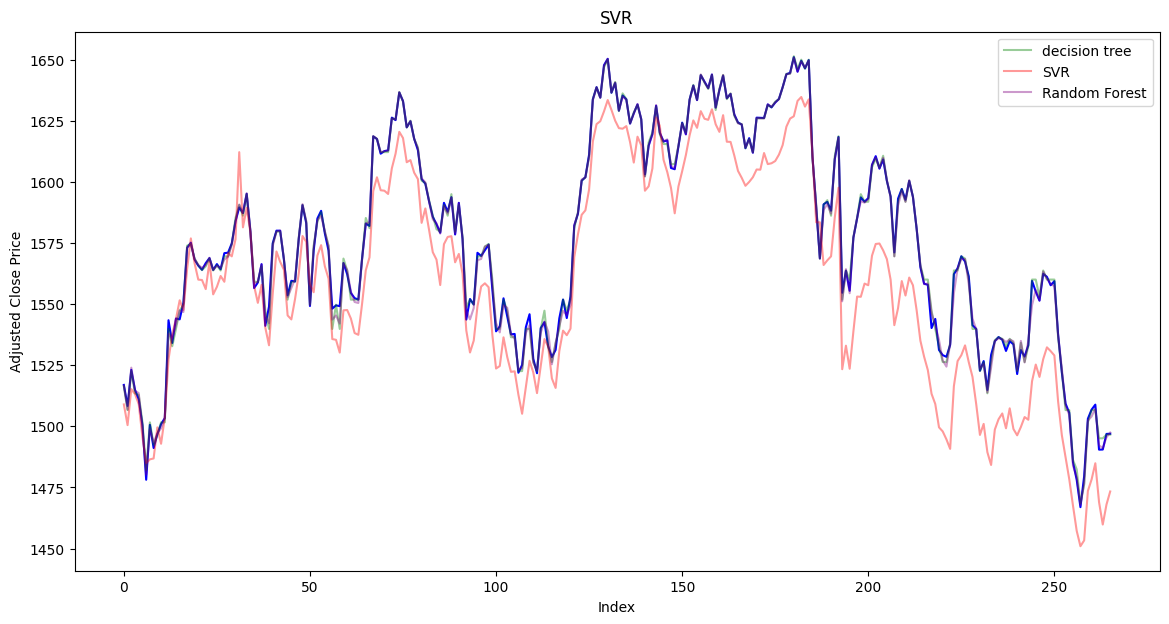

Decision Tree - Mse: 3.685229864757584, Mape: 2.777645715586684
Support Vector regresser - Mse: 618.5212331554784, Mape: 2.949009484956954
Random Forest - Mse: 4.313206080006708, Mape: 3.246897634215399
Long Short Term memory - Mse: waiting, Mape: waiting


In [ ]:
plt.figure(figsize=(14, 7))

plt.plot( yalltestdf,color='blue' )
plt.plot( decisiontree_alltest, label='decision tree', color='green',alpha=0.4)
plt.plot( SVRalltestdf, label='SVR', color='red',alpha=0.4)
plt.plot( RFalltestdf, label='Random Forest', color='purple',alpha=0.4)
#plt.plot( lstmallpredict, label='LSTM', color='pink',alpha=0.4)

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.title('SVR')
plt.legend()
plt.show()

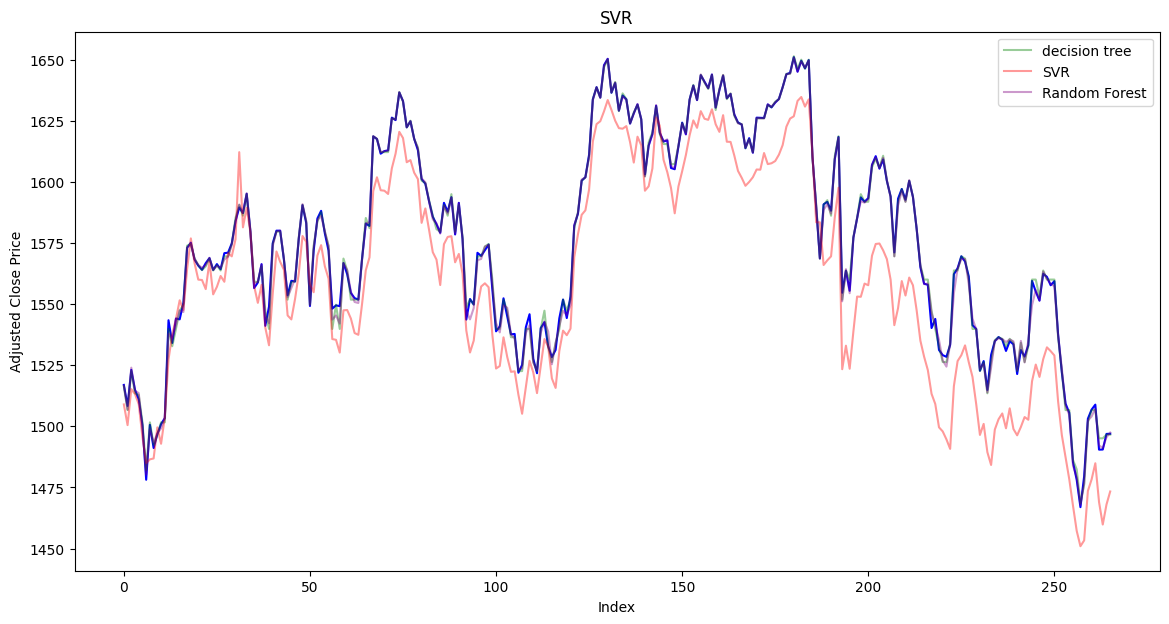

Decision Tree - Mse: 3.685229864757584, Mape: 2.777645715586684
Support Vector regresser - Mse: 618.5212331554784, Mape: 2.949009484956954
Random Forest - Mse: 4.313206080006708, Mape: 3.246897634215399
Long Short Term memory - Mse: waiting, Mape: waiting


In [ ]:
plt.figure(figsize=(14, 7))

plt.plot( yalltestdf,color='blue' )
plt.plot( decisiontree_alltest, label='decision tree', color='green',alpha=0.4)
plt.plot( SVRalltestdf, label='SVR', color='red',alpha=0.4)
plt.plot( RFalltestdf, label='Random Forest', color='purple',alpha=0.4)
#plt.plot( lstmallpredict, label='LSTM', color='pink',alpha=0.4)

# Labels and Legend
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.title('SVR')
plt.legend()
plt.show()
#dt
print('Decision Tree - Mse: ' + str(DTaveragemse) + ', Mape: ' + str(DTaveragemape))
#svr
print('Support Vector regresser - Mse: ' + str(SVRaveragemse) + ', Mape: ' + str(SVRaveragemape))
#rf
print('Random Forest - Mse: ' + str(RFaveragemse) + ', Mape: ' + str(RFaveragemape))

print('Long Short Term memory - Mse: waiting, Mape: waiting')

In [ ]:
DT = pd.DataFrame(decisiontree_alltest, columns=['Close'])

In [ ]:
SVRDF = pd.DataFrame(SVRalltestdf, columns=['Close'])

In [ ]:
RFDF = pd.DataFrame(RFalltestdf, columns=['Close'])

In [ ]:
print(DT.shape)
print(SVRDF.shape)
print(RFDF.shape)

(266, 1)
(266, 1)
(266, 1)


In [ ]:
DT.to_csv('DecisionTree_Close.csv',index = False)
SVRDF.to_csv('SVR_Close.csv',index = False)
RFDF.to_csv('RandomForest_Close.csv',index = False)

In [ ]:
SVRDF

,Close
0,1508.955950
1,1500.493070
2,1515.216164
3,1513.165839
4,1509.081485
...,...
261,1484.885707
262,1468.999712
263,1459.815095
264,1468.006872


In [ ]:
ALLY = pd.DataFrame(yalltestdf, columns=['Close'])

In [ ]:
ALLY.to_csv('Actual.csv',index = False)